# Program synthesis results analysis

In [36]:
import os
import sys 
import numpy as np
import pandas as pd 

In [37]:
sys.path.append("../")
sys.path.append("../../")

In [45]:
from src.utils.files import json2data

path = "/home/koutchc1/learnlab2023/outputs/gpt-3.5-turbo_v1_result_evaluation.json"
df = pd.DataFrame(json2data(path))
df = df.drop(columns=["Unnamed: 0"])
df

,problem_id,prompts,code,testcase,correctness,exec_result,score,text
0,a3_3_animals,You are a helpful Teaching Assistant in a CS1 ...,"\nlist_of_animals = [""A"", ""B"", ""C""]\n\nfor ani...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,Unit Test Returned: 0.0\n
1,a3_1_cargo,You are a helpful Teaching Assistant in a CS1 ...,,"from cs110 import autograder\nimport random, m...",False,completed,0.0,----------------------------------------------...
2,a3_3_games,You are a helpful Teaching Assistant in a CS1 ...,"\nlist_of_games = [""A"", ""B"", ""C""]\nfor game in...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,Unit Test Returned: 0.0\n
3,a3_4_heights,You are a helpful Teaching Assistant in a CS1 ...,"\nlist_of_heights = [53, 60, 65]\nheight_range...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,Incorrect range. Remember that the range is t...
4,pex3,You are a helpful Teaching Assistant in a CS1 ...,,"from cs110 import autograder\r\nimport random,...",False,completed,0.0,----------------------------------------------...
...,...,...,...,...,...,...,...,...
656,a1_1_icbm,You are a helpful Teaching Assistant in a CS1 ...,"\nicbm_name = input(""Enter the name of the ICB...","#import cs110,\r\nimport random, math\r\nfrom ...",False,completed,100.0,SUCCESS!\n\nUnit Test Returned: 100.0\n
657,a1_1_dorms,You are a helpful Teaching Assistant in a CS1 ...,# solution\n,"from cs110 import autograder\nimport random, m...",False,completed,0.0,INCORRECT. Expected: The Vandenburg dormitory ...
658,a1_1_cadet,You are a helpful Teaching Assistant in a CS1 ...,\ncadet_name = input()\ncadet_height = float(i...,"#import cs110,\r\nimport random, math\r\nfrom ...",False,completed,100.0,SUCCESS!\n\nUnit Test Returned: 100.0\n
659,a1_1_bases,You are a helpful Teaching Assistant in a CS1 ...,"\nbase_name = input(""Enter the name of the Air...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,INCORRECT. Expected: Barksdale Air Force Base ...


In [46]:
fails = df[df["exec_result"] != "completed"]
df = df[df["exec_result"] == "completed"]
df

,problem_id,prompts,code,testcase,correctness,exec_result,score,text
0,a3_3_animals,You are a helpful Teaching Assistant in a CS1 ...,"\nlist_of_animals = [""A"", ""B"", ""C""]\n\nfor ani...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,Unit Test Returned: 0.0\n
1,a3_1_cargo,You are a helpful Teaching Assistant in a CS1 ...,,"from cs110 import autograder\nimport random, m...",False,completed,0.0,----------------------------------------------...
2,a3_3_games,You are a helpful Teaching Assistant in a CS1 ...,"\nlist_of_games = [""A"", ""B"", ""C""]\nfor game in...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,Unit Test Returned: 0.0\n
3,a3_4_heights,You are a helpful Teaching Assistant in a CS1 ...,"\nlist_of_heights = [53, 60, 65]\nheight_range...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,Incorrect range. Remember that the range is t...
4,pex3,You are a helpful Teaching Assistant in a CS1 ...,,"from cs110 import autograder\r\nimport random,...",False,completed,0.0,----------------------------------------------...
...,...,...,...,...,...,...,...,...
656,a1_1_icbm,You are a helpful Teaching Assistant in a CS1 ...,"\nicbm_name = input(""Enter the name of the ICB...","#import cs110,\r\nimport random, math\r\nfrom ...",False,completed,100.0,SUCCESS!\n\nUnit Test Returned: 100.0\n
657,a1_1_dorms,You are a helpful Teaching Assistant in a CS1 ...,# solution\n,"from cs110 import autograder\nimport random, m...",False,completed,0.0,INCORRECT. Expected: The Vandenburg dormitory ...
658,a1_1_cadet,You are a helpful Teaching Assistant in a CS1 ...,\ncadet_name = input()\ncadet_height = float(i...,"#import cs110,\r\nimport random, math\r\nfrom ...",False,completed,100.0,SUCCESS!\n\nUnit Test Returned: 100.0\n
659,a1_1_bases,You are a helpful Teaching Assistant in a CS1 ...,"\nbase_name = input(""Enter the name of the Air...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,INCORRECT. Expected: Barksdale Air Force Base ...


In [47]:
df

,problem_id,prompts,code,testcase,correctness,exec_result,score,text
0,a3_3_animals,You are a helpful Teaching Assistant in a CS1 ...,"\nlist_of_animals = [""A"", ""B"", ""C""]\n\nfor ani...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,Unit Test Returned: 0.0\n
1,a3_1_cargo,You are a helpful Teaching Assistant in a CS1 ...,,"from cs110 import autograder\nimport random, m...",False,completed,0.0,----------------------------------------------...
2,a3_3_games,You are a helpful Teaching Assistant in a CS1 ...,"\nlist_of_games = [""A"", ""B"", ""C""]\nfor game in...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,Unit Test Returned: 0.0\n
3,a3_4_heights,You are a helpful Teaching Assistant in a CS1 ...,"\nlist_of_heights = [53, 60, 65]\nheight_range...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,Incorrect range. Remember that the range is t...
4,pex3,You are a helpful Teaching Assistant in a CS1 ...,,"from cs110 import autograder\r\nimport random,...",False,completed,0.0,----------------------------------------------...
...,...,...,...,...,...,...,...,...
656,a1_1_icbm,You are a helpful Teaching Assistant in a CS1 ...,"\nicbm_name = input(""Enter the name of the ICB...","#import cs110,\r\nimport random, math\r\nfrom ...",False,completed,100.0,SUCCESS!\n\nUnit Test Returned: 100.0\n
657,a1_1_dorms,You are a helpful Teaching Assistant in a CS1 ...,# solution\n,"from cs110 import autograder\nimport random, m...",False,completed,0.0,INCORRECT. Expected: The Vandenburg dormitory ...
658,a1_1_cadet,You are a helpful Teaching Assistant in a CS1 ...,\ncadet_name = input()\ncadet_height = float(i...,"#import cs110,\r\nimport random, math\r\nfrom ...",False,completed,100.0,SUCCESS!\n\nUnit Test Returned: 100.0\n
659,a1_1_bases,You are a helpful Teaching Assistant in a CS1 ...,"\nbase_name = input(""Enter the name of the Air...","from cs110 import autograder\r\nimport random,...",False,completed,0.0,INCORRECT. Expected: Barksdale Air Force Base ...


In [ ]:
df

In [41]:
fails

,Unnamed: 0,problem_id,prompts,code,testcase,correctness,exec_result,score,text
25,25,lsn6_skill1,You are a helpful Teaching Assistant in a CS1 ...,\n# Prompt the user for 3 different values\nva...,"from cs110 import autograder\r\nimport random,...",False,failed:,0.0,
27,27,lsn6_math,You are a helpful Teaching Assistant in a CS1 ...,\nimport math\n\nx = float(input())\ny = float...,"from cs110 import autograder\r\nimport random,...",False,failed: equals() takes 2 positional arguments ...,0.0,
32,32,lsn5_skill2,You are a helpful Teaching Assistant in a CS1 ...,"your_age = int(input(""Enter your age: ""))\npri...",from cs110 import autograder\r\nimport random\...,False,failed: invalid literal for int() with base 10...,0.0,
36,36,lsn5_madlib,You are a helpful Teaching Assistant in a CS1 ...,name = input()\nplace = input()\nnumber = inpu...,from cs110 import autograder\r\nimport random\...,False,"failed: can only concatenate str (not ""int"") t...",0.0,
42,42,lsn33_practice8,You are a helpful Teaching Assistant in a CS1 ...,"\nimport csv\n\nstart_year = int(input(""Enter ...","from cs110 import autograder\r\nimport random,...",False,failed: [Errno 2] No such file or directory: '...,0.0,
...,...,...,...,...,...,...,...,...,...
646,646,a1_3_speed,You are a helpful Teaching Assistant in a CS1 ...,\nif aircraft_speed > speed_of_sound:\n pri...,"from cs110 import autograder\r\nimport random,...",False,failed: name 'aircraft_speed' is not defined,0.0,
650,650,a1_3_arrow,You are a helpful Teaching Assistant in a CS1 ...,"\nif arrow_height > apple_height:\n print(""...","from cs110 import autograder\r\nimport random,...",False,failed: name 'arrow_height' is not defined,0.0,
652,652,a1_2_radius,You are a helpful Teaching Assistant in a CS1 ...,\nimport math\n\narea = math.pi * radius**2 * ...,"from cs110 import autograder\r\nimport random,...",False,failed: name 'radius' is not defined,0.0,
653,653,a1_2_cones,You are a helpful Teaching Assistant in a CS1 ...,\nimport math\n\nvolume = (math.pi * radius **...,"from cs110 import autograder\r\nimport random,...",False,failed: name 'radius' is not defined,0.0,


In [33]:
for pid, fail_reason, testcase in zip(fails.problem_id, fails.exec_result, fails.testcase):
    print(pid)
    print(fail_reason)
    print(testcase)
    print("-----------")
    print()

lsn6_skill1
failed: 
from cs110 import autograder
import random, math

num_tests_passed = 0
num_tests_run = 0

# The Actual Solution
def solution(body_temperature):
    if body_temperature >= 97 and body_temperature <= 99:
        return "Normal"
    else:
        return "Abnormal"


def run_test(body_temperature):
    global num_tests_run, num_tests_passed
    
    num_tests_run += 1
    
    print("--------------------------------------------")
    print("Testing Temperature =", body_temperature)
    print("--------------------------------------------")
    output, error_message = autograder.run_script("lsn6_skill1.py", [body_temperature])
        
    if output.strip() == solution(body_temperature):
        print("SUCCESS!\n")
        num_tests_passed += 1
    else:
        print("INCORRECT.  Expected:", solution(body_temperature), "\n")


# Runs the Python script and sees if it passes the test(s)
def test_passed():
    run_test(96.9)
    run_test(97)
    run_test(98.5)
    run_test

In [29]:
print(fails[fails.problem_id == "lsn20_averagetraffic"].code.iloc[0])


import csv

with open('traffic.csv') as file:
    reader = csv.reader(file)
    next(reader) # skip header row
    data = list(reader)

total_count = 0
num_roads = 0

for row in data:
    count = int(row[4])
    total_count += count
    num_roads += 1

average = total_count / num_roads

count_greater_than_average = 0

for row in data:
    count = int(row[4])
    if count >= average:
        count_greater_than_average += 1

print(count_greater_than_average)



In [30]:
print(fails[fails.problem_id == "lsn20_averagetraffic"].prompts.iloc[0])

You are a helpful Teaching Assistant in a CS1 programming course teaching the basics of python programming. Please provide a solution to this problem description:You are a helpful Teaching Assistant in a CS1 programming course teaching the basics of python programming. Please provide a solution to this problem description: 
Problem description:




**PROBLEM STATEMENT:  
**

This program makes use of the traffic.csv dataset. Here is a typical line from
the file:



`691,6067 North,Kimball Ave,8/15/06,15600,North Bound:7500/South Bound:8100`



  
As you will recall from class, each position in the line (separated by a
comma) represents a different "data element". Here is a key for your
reference:

ID | Address | Street | Sample Date | Total # of Passing Vehicles | # of
Vehicles by Direction  
---|---|---|---|---|---  
691 | 6067 North | Kimball Ave | 8/15/06 | 15600 | North Bound:7500/South
Bound:8100  
  
  
  
Write a Python algorithm that opens the file and outputs the # of roads wh

In [53]:
for prompt, code, testcase, error in df[["prompts", "code", "testcase", "text"]].to_numpy():
    print("prompt")
    print(prompt)
    print("code")
    print(code)
    print("error")
    print(error)
    print("testcase")
    print(testcase)
    print("----------")
    print()
    print()

prompt
You are a helpful Teaching Assistant in a CS1 programming course teaching the basics of python programming. Please provide a solution to this problem description:You are a helpful Teaching Assistant in a CS1 programming course teaching the basics of python programming. Please provide a solution to this problem description: 
Problem description:


**PROBLEM STATEMENT:  
** You have been provided with a list called `list_of_animals`. Write a
program that prints out each of the items in this list (one item per line).



**EXAMPLE:  
** If, for example, the list contained the items: "A", "B", "C"

Your program should print:

    
    
    A  
    B  
    C



**NOTE:**

  * You must use a loop to complete this task. 




The answer should be code only, please do not provide explanations. Please put the answer within the fenced code block. 
code

list_of_animals = ["A", "B", "C"]

for animal in list_of_animals:
    print(animal)

error
Unit Test Returned: 0.0

testcase
from cs110 imp

In [50]:
"9.800510190801294" == "9.800510190801294"

True

In [49]:
9.800510190801294 == 9.800510190801294

True

## Main statistics

In [4]:
df.score

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
656    100.0
657      0.0
658    100.0
659      0.0
660      0.0
Name: score, Length: 661, dtype: float64

In [5]:
df.score.mean()

37.50818624978988

In [6]:
import seaborn as sns

/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


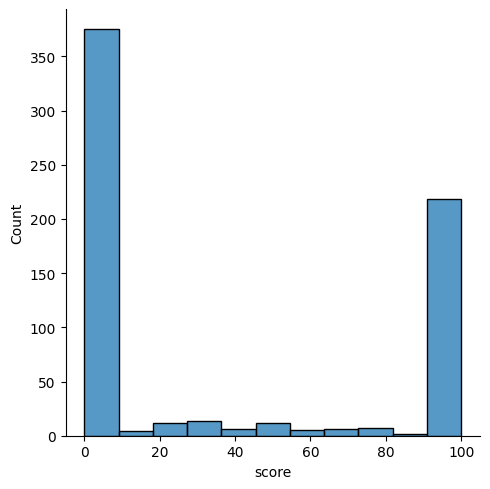

In [7]:
sns.displot(data=df, x="score")

Let's take a look at what's the average correctness 